# This notebook extracts final map data at a given acquisition time from the Zenodo dataset and prepares it for the production pipeline.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import json
import h5py

In [ ]:
from ddae1d.paths import PROJECT_ROOT

In [ ]:
with open('config.json', 'r') as f:
    config = json.load(f)

acq_time = config["acq_time"]

In [ ]:
map_data_path = PROJECT_ROOT / f"data/from-zenodo/map-{acq_time}ms.h5"
with h5py.File(map_data_path, 'r') as h5file:
    raman_shift = h5file['raman_shift'][:]
    map_data = h5file['raw_spectra'][:]

Necessary cleanup of the map data (for mapping consistency) is performed below.

In [ ]:
map_tmp = np.zeros((map_data.shape[0], map_data.shape[1] - 3, map_data.shape[2]))
map_tmp[::2, :, :] = map_data[::2, :-3, :]
map_tmp[1::2, :, :] = map_data[1::2, 3:, :]
map_data = map_tmp

## Identifying and removing outliers (set to NaN)

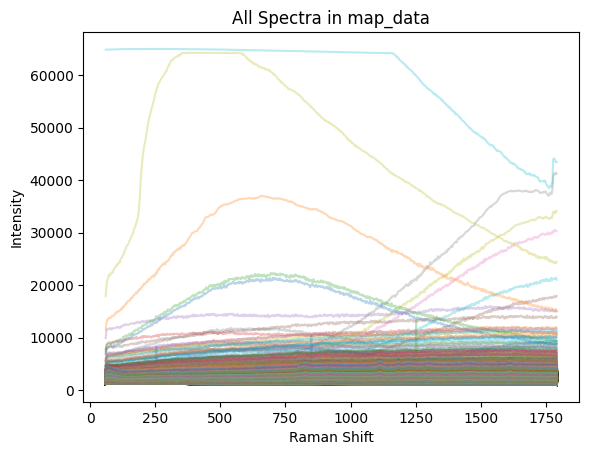

In [ ]:
for i in range(map_data.shape[0]):
    for j in range(map_data.shape[1]):
        plt.plot(raman_shift, map_data[i, j, :], alpha=0.3)
plt.xlabel('Raman Shift')
plt.ylabel('Intensity')
plt.title('All Spectra in map_data')
plt.show()

### Setting a threshold for outlier detection

In [ ]:
threshold = 20000

In [ ]:
mask = np.max(map_data, axis=2) > threshold
map_data[mask] = np.nan

In [ ]:
for i in range(map_data.shape[0]):
    for j in range(map_data.shape[1]):
        plt.plot(raman_shift, map_data[i, j, :], alpha=0.3)
plt.xlabel('Raman Shift')
plt.ylabel('Intensity')
plt.title('All Spectra in map_data')
plt.show()

In [ ]:
np.save(PROJECT_ROOT / "data" / "raw" / "final-map" / "raw-final-map.npy", map_data)